In [ ]:
# run this cell
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

!pip install albumentations > /dev/null
!pip install -U efficientnet==0.0.4
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image

seed = 10
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

tf.set_random_seed(seed)
    
%matplotlib inline

ERROR: Operation cancelled by user
^C


KeyboardInterrupt: ignored

In [ ]:
#Run this cell
#!pip install albumentations > /dev/null
#!pip install -U efficientnet==0.0.4
!pip install keras_efficientnets
#%tensorflow_version 1.x
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization, Multiply, Subtract
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils, plot_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image

seed = 10
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

#tf.set_random_seed(seed)
    
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# run this cell
import tensorflow
print(tensorflow.__version__)

2.2.0


In [ ]:


def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    
    
# encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
#middle
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same', name = 'middle_point')(conv5)
# decoder
    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same', name = 'up7')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

unet = unet()
unet.load_weights("/content/drive/My Drive/CT_SCAN_SARS-COV_2/final_unet/mosmeddata_unet/63_percent.h5")

In [ ]:
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(blockInput, num_filters=16):
    x = LeakyReLU(alpha=0.1)(blockInput)
    x = BatchNormalization()(x)
    blockInput = BatchNormalization()(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    return x

In [ ]:
from efficientnet import EfficientNetB4

def UEfficientNet(input_shape=(None, None, 3),dropout_rate=0.1):

    backbone = EfficientNetB4(weights='imagenet',
                            include_top=False,
                            input_shape=input_shape)
    input = backbone.input
    start_neurons = 8

    conv4 = backbone.layers[342].output
    conv4 = LeakyReLU(alpha=0.1)(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(dropout_rate)(pool4)
    
     # Middle
    convm = Conv2D(start_neurons * 32, (3, 3), activation=None, padding="same",name='conv_middle')(pool4)
    convm = residual_block(convm,start_neurons * 32)
    convm = residual_block(convm,start_neurons * 32)
    convm = LeakyReLU(alpha=0.1)(convm)
    
    deconv4 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)
    deconv4_up1 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4)
    deconv4_up2 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4_up1)
    deconv4_up3 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4_up2)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(dropout_rate, name='conv_mid_right')(uconv4) 
    
    uconv4 = Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(uconv4)
    uconv4 = residual_block(uconv4,start_neurons * 16)
#   uconv4 = residual_block(uconv4,start_neurons * 16)
    uconv4 = LeakyReLU(alpha=0.1)(uconv4)  #conv1_2
    
    deconv3 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv4)
    deconv3_up1 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3)
    deconv3_up2 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3_up1)
    conv3 = backbone.layers[154].output
    uconv3 = concatenate([deconv3,deconv4_up1, conv3])    
    uconv3 = Dropout(dropout_rate)(uconv3)
    
    uconv3 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = residual_block(uconv3,start_neurons * 8)
#     uconv3 = residual_block(uconv3,start_neurons * 8)
    uconv3 = LeakyReLU(alpha=0.1)(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv3)
    deconv2_up1 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(deconv2)
    conv2 = backbone.layers[92].output
    uconv2 = concatenate([deconv2,deconv3_up1,deconv4_up2, conv2])
        
    uconv2 = Dropout(0.1)(uconv2)
    uconv2 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = residual_block(uconv2,start_neurons * 4)
#     uconv2 = residual_block(uconv2,start_neurons * 4)
    uconv2 = LeakyReLU(alpha=0.1)(uconv2)
    
    deconv1 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv2)
    conv1 = backbone.layers[30].output
    uconv1 = concatenate([deconv1,deconv2_up1,deconv3_up2,deconv4_up3, conv1])
    
    uconv1 = Dropout(0.1)(uconv1)
    uconv1 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = residual_block(uconv1,start_neurons * 2)
#     uconv1 = residual_block(uconv1,start_neurons * 2)
    uconv1 = LeakyReLU(alpha=0.1)(uconv1)
    
    uconv0 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv1)   
    uconv0 = Dropout(0.1)(uconv0)
    uconv0 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv0)
    uconv0 = residual_block(uconv0,start_neurons * 1)
#     uconv0 = residual_block(uconv0,start_neurons * 1)
    uconv0 = LeakyReLU(alpha=0.1)(uconv0)
    
    uconv0 = Dropout(dropout_rate/2)(uconv0)
    output_layer = Conv2D(3, (1,1), padding="same", activation="softmax")(uconv0)    
    
    model = Model(input, output_layer)
    model.name = 'u-xception'

    return model

In [ ]:
K.clear_session()
img_size = 256
model = UEfficientNet(input_shape=(img_size,img_size,3),dropout_rate=0.5)

In [ ]:
model.summary()

Model: "u-xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 128, 128, 48) 0           batch_normalization_1[0][0]      
_________________________________________________________________________________________

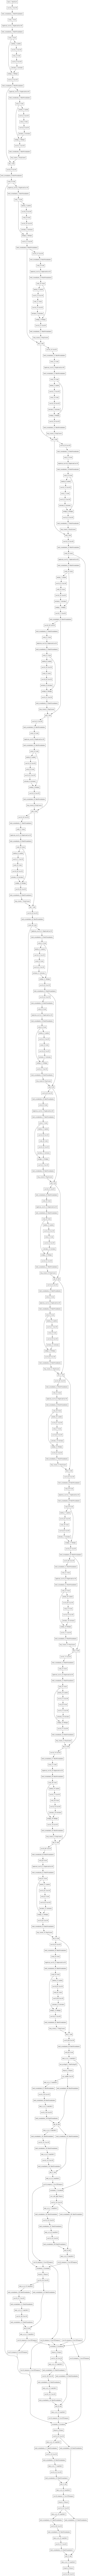

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
u_net_weights = "/content/drive/My Drive/CT_SCAN_SARS-COV_2/final_unet/unet++efficientnet/full_coronacases_unet++efficientnet.h5"
model.load_weights(u_net_weights)

In [ ]:
for layer in model.layers:
	layer.trainable = False

In [ ]:
#run this cell 


def jahin_activation(x):
    return (1. / (1. + K.exp(5*(x-0.5))))

In [ ]:
#run this cell
def mse_block_2(x_input):  # this block takes a block of input shape (256, 256, nb_channels) )(256,256, 64)
  x_in1 = GlobalAveragePooling2D()(x_input)
  x_in1 = Dense(int(x_input.shape[-1]//4) , activation = 'relu')(x_in1)
  x_in1 = Dense(int(x_input.shape[-1]), activation = 'sigmoid')(x_in1)
  s1 = Multiply()([x_in1 , x_input])

  x_in2 = Conv2D(filters = int(x_input.shape[-1]), kernel_size = (3,3), strides = (2,2), padding = 'same')(x_input)
  x_in2 = Conv2DTranspose (filters = 1, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'sigmoid')(x_in2)
  s2 = Multiply()([x_in2 , x_input])
  
  #s1_0 =  Dense(int(x_input.shape[-1]), activation = jahin_activation)(x_in1)
  #s1_0 =  Multiply()([s1_0 , x_input])
  #s1_0 =  Conv2D(filters = int(x_input.shape[-1]), kernel_size = (1,1), strides = (1,1), padding = 'same', activation= 'relu')(s1_0)
    
  s2_0 =  Conv2D(filters = int(x_input.shape[-1]), kernel_size = (3,3), strides = (1,1), padding = 'same', activation= jahin_activation)(x_in2)
  s2_0 =  Multiply()([s2_0 , x_input])
  s2_0 =  Conv2D(filters = int(x_input.shape[-1]), kernel_size = (1,1), strides = (1,1), padding = 'same', activation= 'relu')(s2_0)
  
  #s12_0 = Concatenate() ([s1_0, s2_0])
  #s12_0 = Conv2D (filters = int(x_input.shape[-1]), kernel_size = (1,1),strides = (1,1), padding = 'same' , activation = 'relu')(s12_0)
  out = Concatenate() ([s1, s2])
  out = Conv2D (filters = int(x_input.shape[-1]), kernel_size = (1,1),strides = (1,1), padding = 'same' , activation = 'relu')(out)
  out = Add()([out , x_input])
  out = Subtract()([out, s2_0])
  
  return out

In [ ]:
#run this cell 
from keras_efficientnets import EfficientNetB5

backbone = EfficientNetB5(weights='imagenet',
                          include_top=False,
                          input_shape=(256, 256, 3))

backbone = Model(backbone.input, backbone.layers[515].output)
backbone.summary()

115302400/115295288 [==============================] - 3s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 128, 128, 48) 1296        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_18[0][0]                  
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 128, 128, 48) 0           batch_normalization_1[0][0]      
_________________________

In [ ]:
#run this cell
def M_unet(backbone, heavier=0):
  a1 = backbone.layers[41].output   #128x128x144       |
  a2 = backbone.layers[115].output  #64x64x240         |
  a3 = backbone.layers[189].output  #32x32x384         |    <--encoder
  a4 = backbone.layers[397].output  #16x16x1056        |
  a5 = backbone.layers[-1].output   #8x8x1824          |



  def just_conv(x, filter_, ker=3, up=0, ):
      if up:  x= UpSampling2D((2,2))(x)
      x = Conv2D(filter_, (ker,ker), activation='relu', padding='same')(x)
      return x

  factor=1
  if heavier: factor=2

  a10 = just_conv(a1, 16*factor, up=1)
  a20 = just_conv(a2, 32*factor, up=1)
  a30 = just_conv(a3, 64*factor, up=1)
  a40 = just_conv(a4, 128*factor, up=1)
  a50 = just_conv(a5, 256*factor, up=1)


  a10 = mse_block_2(a10)
  a20 = mse_block_2(a20)
  a30 = mse_block_2(a30)
  a40 = mse_block_2(a40)
  a50 = mse_block_2(a50)
  
  b6 = just_conv(a5, 256*factor)                                    #           |            
  b6 = just_conv(b6, 256*factor, up=1)

  b5 = concatenate([b6,a50], axis=-1)                               #           |
  b5 = just_conv(b5, 256*factor)
  b5 = Conv2D(256*factor, (3,3), activation='relu', padding='same', name = 'up5')(b5)
  #b5 = just_conv(b5, 256*factor)


  b4 = concatenate([just_conv(b5, 256*factor, up=1), a40], axis=-1) #           | # EKHANE JHAMELA
  b4 = just_conv(b4, 128*factor)
  b4 = Conv2D(128*factor, (3,3), activation='relu', padding='same', name = 'up6')(b4)


  b3 = concatenate([just_conv(b4, 128*factor, up=1), a30], axis=-1) #           |  <--decoder
  b3 = just_conv(b3, 64*factor)
  b3 = Conv2D(64*factor, (3,3), activation='relu', padding='same', name = 'up7')(b3)


  b2 = concatenate([just_conv(b3, 64*factor, up=1), a20], axis=-1)  #           |
  b2 = just_conv(b2, 32*factor)
  b2 = Conv2D(32*factor, (3,3), activation='relu', padding='same', name = 'up8')(b2)

  
  b1 = concatenate([just_conv(b2, 32*factor, up=1), a10], axis=-1)  #           |
  b1 = just_conv(b1, 16*factor)
  b1 = Conv2D(16*factor, (3,3), activation='relu', padding='same', name = 'up9')(b1)         #           |

  out = Conv2D(1, (1, 1), activation='sigmoid')(b1)

  model= Model(backbone.input, out)

  #print(b5.shape)
  #print(b4.shape)
  #print(b3.shape)
  #print(b2.shape)
  #print(b1.shape)
  return model



m_unet= M_unet(backbone,0)
m_unet.load_weights ('/content/drive/My Drive/CT_SCAN_SARS-COV_2/h5s/m_unet_tf2.2_light_lr1.5e_3_jahin.h5')   #paste the h5 file path 

In [ ]:
# run this cell
for layer in m_unet.layers:
  layer.trainable = False

In [ ]:
# run this cell
out = m_unet.get_layer("up7").output
model_cut_right = Model(inputs = m_unet.input, outputs = out)
model_cut_right.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 128, 128, 48) 1296        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_18[0][0]                  
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 128, 128, 48) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
out = model.get_layer("conv_middle").output
model_cut_en = Model(inputs = model.input, outputs = out)
#model_cut_en.summary()

out = model.get_layer("conv_mid_right").output
model_cut_right = Model(inputs = model.input, outputs = out)
model_cut_right.summary()

NameError: ignored

In [ ]:
# run this cell
from keras.layers import *
def volume_feature_map(in_shape):
    x_in_0 = Input(in_shape)
    slice_num= x_in_0.shape[-1]
    print(x_in_0.shape)
    x_in = Reshape((256, 256, 3, slice_num))(x_in_0)
    branch = []
    for i in range(slice_num):
        x_out = Lambda(lambda x: x[:,:,:,:,i])(x_in)
        x_out = model_cut_right(x_out)
        #print(x_out.shape)
        x_out = Conv2D(16, (3, 3), activation='relu', padding='same')(x_out)
        #print(x_out.shape)
        branch.append(x_out)
        print(i)
        
    
    x = Concatenate(axis=-1)(branch)
    
    
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    # x = Flatten()(x)

    x = LeakyReLU(alpha=0.1) (x)
    x = Dropout(0.1)(x)
    print(x.shape)
    x = Dense(128, activation='relu')(x)
    x= Dense(64, activation = 'relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    
    model = Model(x_in_0, x)
    
    
    return model

In [ ]:
# run this cell
model_appended=volume_feature_map((256, 256, 3, 29)) #change 10 to 35 or 40

(None, 256, 256, 3, 29)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
(None, 256)


In [ ]:
# run this cell
model_appended.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3,  0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 256, 256, 3,  0           input_3[0][0]                    
__________________________________________________________________________________________________
lambda_40 (Lambda)              (None, 256, 256, 3)  0           reshape_1[0][0]                  
__________________________________________________________________________________________________
lambda_41 (Lambda)              (None, 256, 256, 3)  0           reshape_1[0][0]                  
____________________________________________________________________________________________

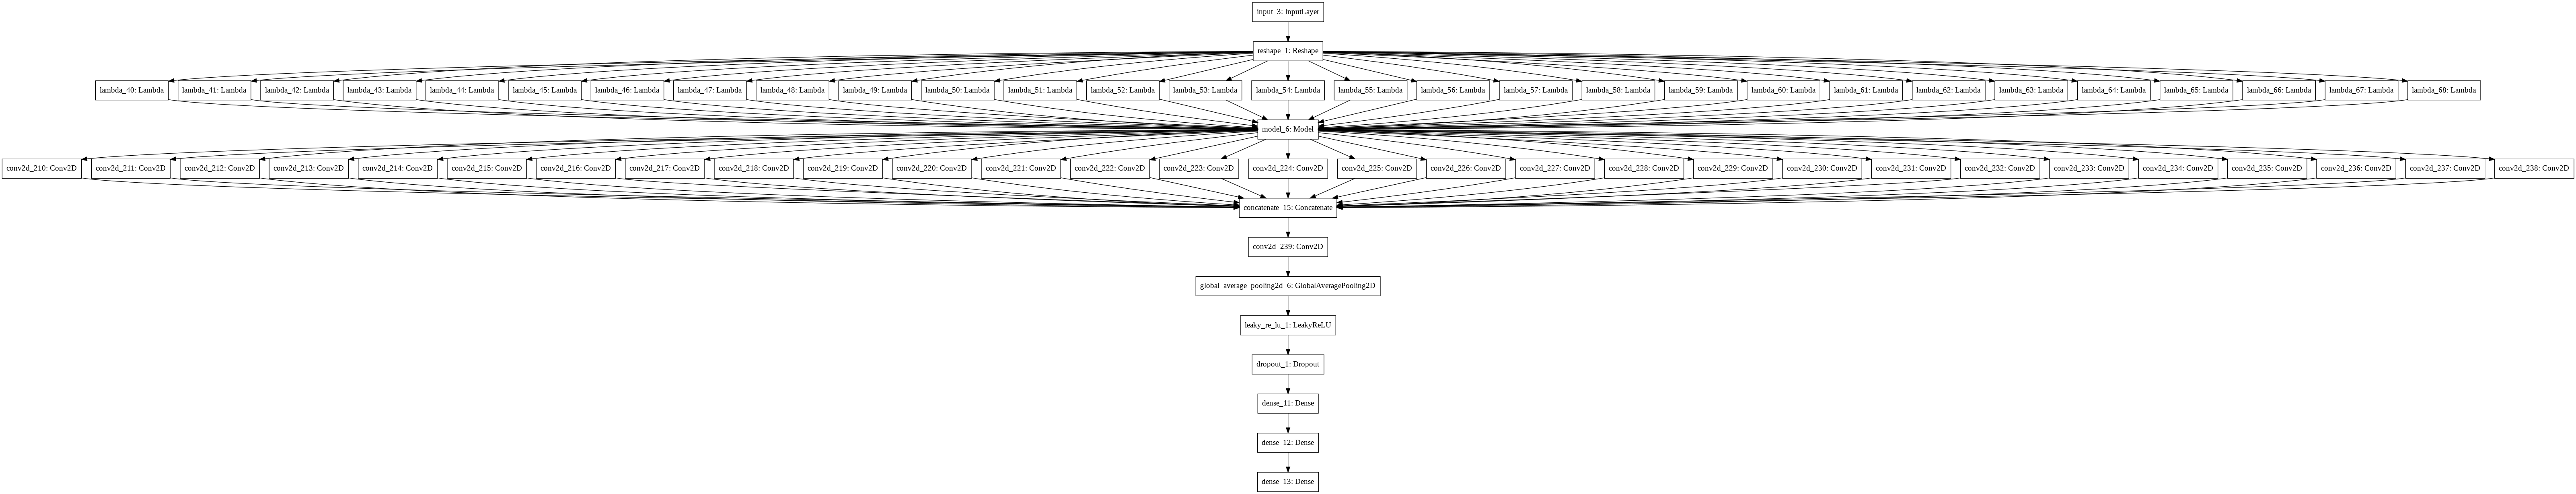

In [ ]:
# run this cell
from keras.utils.vis_utils import plot_model
plot_model(model_appended)

In [ ]:
# run this cell
#im_dir = "/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/CLASSIFIER_PATIENT_WISE/train"

a1 = os.path.join(im_dir, os.listdir(im_dir)[0])
a2 = os.path.join(im_dir, os.listdir(im_dir)[1])
bunches = 270
patients = len(os.listdir(a1))+len(os.listdir(a2))



In [ ]:
ct0 = '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/SEVERITY/CT 0'
ct1 = '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/SEVERITY/CT 1'
ct2 = '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/SEVERITY/CT 2'
ct3 = '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/SEVERITY/CT 3'

In [ ]:
# run this cell
init = 0  #don't exceed 5
bunch_1= bunches/2
bunch_0= bunches/2

if (len(os.listdir(a1))-bunch_1*(init+1)) <20: 
  rest1 = int(len(os.listdir(a1))-bunch_1*(init+1))
else :
  rest1 = 0

if (len(os.listdir(a2))-bunch_0*(init+1)) <20: 
  rest2 = int(len(os.listdir(a2))-bunch_0*(init+1))
else :
  rest2 = 0

X = np.empty((bunches+rest1+rest2, 256, 256, 3, 29), dtype= np.float64)
Y = np.empty((bunches+rest1+rest2), dtype= int)

X.shape

(270, 256, 256, 3, 29)

In [ ]:
import numpy as np
bunch = 40
X = np.empty((bunch, 256, 256, 3, 29) , dtype = np.float64)
Y = np.empty(bunch, dtype = int)

In [ ]:
import cv2
for i in range(bunch/4):
  a0_1 = os.path.join (ct0 , os.listdir(ct0)[i]) #patient
  a0_1_1 = np.sort(random.sample(os.listdir(a0_1), 29)) # slice
  for j in range (a0_1_1):
    a011_img = os.path.join(a0_1, a0_1_1[j])
    a011_img = cv2.imread(a011_img)
    a011_img = resize(a011_img, (256, 256,3), anti_aliasing=True)
    X[i, :,:,: ,j] = a011_img
    print("patient : " + str(j) + " slice : " +str(i))
    Y[j] = 0

In [ ]:
for i in range(bunch/4, 2*bunch/4):
  a0_1 = os.path.join (ct0 , os.listdir(ct0)[i - bunch/4]) #patient
  a0_1_1 = np.sort(random.sample(os.listdir(a0_1), 29)) # slice
  for j in range (a0_1_1):
    a011_img = os.path.join(a0_1, a0_1_1[j])
    a011_img = cv2.imread(a011_img)
    a011_img = resize(a011_img, (256, 256,3), anti_aliasing=True)
    X[i, :,:,: ,j] = a011_img
    print("patient : " + str(i) + " slice : " +str(j))
    Y[i] = 1

In [ ]:
for i in range(2*bunch/4, 3*bunch/4):
  a0_1 = os.path.join (ct0 , os.listdir(ct0)[i - 2*bunch/4]) #patient
  a0_1_1 = np.sort(random.sample(os.listdir(a0_1), 29)) # slice
  for j in range (a0_1_1):
    a011_img = os.path.join(a0_1, a0_1_1[j])
    a011_img = cv2.imread(a011_img)
    a011_img = resize(a011_img, (256, 256,3), anti_aliasing=True)
    X[i, :,:,: ,j] = a011_img
    print("patient : " + str(i) + " slice : " +str(j))
    Y[i] = 1

In [ ]:
for i in range(3*bunch/4, 4*bunch/4):
  a0_1 = os.path.join (ct0 , os.listdir(ct0)[i - 3*bunch/4]) #patient
  a0_1_1 = np.sort(random.sample(os.listdir(a0_1), 29)) # slice
  for j in range (a0_1_1):
    a011_img = os.path.join(a0_1, a0_1_1[j])
    a011_img = cv2.imread(a011_img)
    a011_img = resize(a011_img, (256, 256,3), anti_aliasing=True)
    X[i, :,:,: ,j] = a011_img
    print("patient : " + str(i) + " slice : " +str(j))
    Y[i] = 1

In [ ]:
# run this cell
import cv2
for j in range(int(bunch_1*init), int(bunch_1*(init+1)+rest1)):
    a1_1= os.path.join(a1, os.listdir(a1)[j])  #patients
    a1_1_1= np.sort(random.sample(os.listdir(a1_1), 29))  #29 sampling
    for m in range(len(a1_1_1)):
        a111_im = os.path.join(a1_1, a1_1_1[m])
        a111_im = cv2.imread(a111_im)
        a111_im = resize(a111_im, (256, 256,3), anti_aliasing=True)
        X[j, :,:,: ,m] = a111_im
        print("patient : " + str(j) + " slice : " +str(m))
        Y[j] = 1

patient : 0 slice : 0
patient : 0 slice : 1
patient : 0 slice : 2
patient : 0 slice : 3
patient : 0 slice : 4
patient : 0 slice : 5
patient : 0 slice : 6
patient : 0 slice : 7
patient : 0 slice : 8
patient : 0 slice : 9
patient : 0 slice : 10
patient : 0 slice : 11
patient : 0 slice : 12
patient : 0 slice : 13
patient : 0 slice : 14
patient : 0 slice : 15
patient : 0 slice : 16
patient : 0 slice : 17
patient : 0 slice : 18
patient : 0 slice : 19
patient : 0 slice : 20
patient : 0 slice : 21
patient : 0 slice : 22
patient : 0 slice : 23
patient : 0 slice : 24
patient : 0 slice : 25
patient : 0 slice : 26
patient : 0 slice : 27
patient : 0 slice : 28
patient : 1 slice : 0
patient : 1 slice : 1
patient : 1 slice : 2
patient : 1 slice : 3
patient : 1 slice : 4
patient : 1 slice : 5
patient : 1 slice : 6
patient : 1 slice : 7
patient : 1 slice : 8
patient : 1 slice : 9
patient : 1 slice : 10
patient : 1 slice : 11
patient : 1 slice : 12
patient : 1 slice : 13
patient : 1 slice : 14
patient 

In [ ]:
# run this cell
for j in range(int(bunch_1*(init+1)+rest1)+int(bunch_0*init),int(bunch_1*(init+1)+rest1)+int(bunch_0*(init+1)+rest2)):
    a2_1= os.path.join(a2, os.listdir(a2)[j - int(bunch_0)])  #patients
    a2_1_1= np.sort(random.sample(os.listdir(a2_1), 29))  #29 sampling
    for m in range(len(a2_1_1)):
        a211_im = os.path.join(a2_1, a2_1_1[m])
        a211_im = cv2.imread(a211_im)
        a211_im = resize(a211_im, (256, 256, 3), anti_aliasing=True)
        X[j, :,:,:,m ] = a211_im
        print("patient : " + str(j) + " slice : " +str(m))
        Y[j] = 0

patient : 135 slice : 0
patient : 135 slice : 1
patient : 135 slice : 2
patient : 135 slice : 3
patient : 135 slice : 4
patient : 135 slice : 5
patient : 135 slice : 6
patient : 135 slice : 7
patient : 135 slice : 8
patient : 135 slice : 9
patient : 135 slice : 10
patient : 135 slice : 11
patient : 135 slice : 12
patient : 135 slice : 13
patient : 135 slice : 14
patient : 135 slice : 15
patient : 135 slice : 16
patient : 135 slice : 17
patient : 135 slice : 18
patient : 135 slice : 19
patient : 135 slice : 20
patient : 135 slice : 21
patient : 135 slice : 22
patient : 135 slice : 23
patient : 135 slice : 24
patient : 135 slice : 25
patient : 135 slice : 26
patient : 135 slice : 27
patient : 135 slice : 28
patient : 136 slice : 0
patient : 136 slice : 1
patient : 136 slice : 2
patient : 136 slice : 3
patient : 136 slice : 4
patient : 136 slice : 5
patient : 136 slice : 6
patient : 136 slice : 7
patient : 136 slice : 8
patient : 136 slice : 9
patient : 136 slice : 10
patient : 136 slice 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# run this cell
def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a, b

X,Y = shuffle_in_unison_scary(X,Y)

In [ ]:
# run this cell
from keras.optimizers import *
model_appended.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# run this cell
from keras.callbacks import *
weight_saver = ModelCheckpoint('3Dclassifier.h5', monitor='accuracy', mode = 'max',
                                save_best_only=True, save_weights_only=True)
annealer = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.0001)
model_appended.fit(x = X , 
                   y = Y, 
                   batch_size = 2,
                   epochs = 100,
                   callbacks = [weight_saver , annealer],
                   #validation_data = (X_test, y_test), 
                   validation_split = 0.2,
                   shuffle = True,
                   verbose = 1
)

Train on 216 samples, validate on 54 samples
Epoch 1/100
216/216 [==============================] - 36s 165ms/step - loss: 1.8284 - accuracy: 0.4907 - val_loss: 0.6962 - val_accuracy: 0.4259
Epoch 2/100
216/216 [==============================] - 27s 124ms/step - loss: 0.6933 - accuracy: 0.5185 - val_loss: 0.6961 - val_accuracy: 0.4259
Epoch 3/100
216/216 [==============================] - 27s 124ms/step - loss: 0.6915 - accuracy: 0.5324 - val_loss: 0.6690 - val_accuracy: 0.5741
Epoch 4/100
216/216 [==============================] - 27s 124ms/step - loss: 0.6793 - accuracy: 0.6574 - val_loss: 0.5903 - val_accuracy: 0.8704
Epoch 5/100
216/216 [==============================] - 27s 124ms/step - loss: 0.5458 - accuracy: 0.7778 - val_loss: 0.3510 - val_accuracy: 0.8519
Epoch 6/100
216/216 [==============================] - 27s 123ms/step - loss: 0.4445 - accuracy: 0.8056 - val_loss: 0.3086 - val_accuracy: 0.9630
Epoch 7/100
216/216 [==============================] - 27s 123ms/step - loss: 0

KeyboardInterrupt: ignored

In [ ]:
model_appended.predict(X[28:29])

array([[2.1302322e-08]], dtype=float32)

In [ ]:
Y[28]

0

In [ ]:
X.shape

(270, 256, 256, 3, 29)

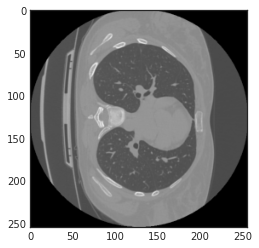

In [ ]:
plt.imshow (X[80,:,:,:,13])

In [ ]:
Y[80]

0